# Handwritten Digit Recognition

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [117]:
train_data = pd.read_csv('/content/Train.csv')
print("Shape of train_data:", train_data.shape)


X = train_data.iloc[:, 1:]
y = train_data.iloc[:, 0]

print("Shape of X after separating features:", X.shape)

Shape of train_data: (24095, 785)
Shape of X after separating features: (24095, 784)


In [118]:
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)
X = X.values / 255.0
X = X.reshape(-1, 28, 28, 1)
print("Shape of X after reshaping:", X.shape)

Shape of X after reshaping: (24095, 28, 28, 1)


In [119]:
y = to_categorical(y, num_classes=10)
print("Shape of y after one-hot encoding:", y.shape)

Shape of y after one-hot encoding: (24095, 10)


In [120]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)

X_train shape: (19276, 28, 28, 1)


In [121]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [122]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7909 - loss: 0.6860 - val_accuracy: 0.9373 - val_loss: 0.2173
Epoch 2/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9475 - loss: 0.1719 - val_accuracy: 0.9521 - val_loss: 0.1578
Epoch 3/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9641 - loss: 0.1170 - val_accuracy: 0.9591 - val_loss: 0.1371
Epoch 4/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9775 - loss: 0.0741 - val_accuracy: 0.9570 - val_loss: 0.1473
Epoch 5/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9827 - loss: 0.0569 - val_accuracy: 0.9620 - val_loss: 0.1277
Epoch 6/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9862 - loss: 0.0434 - val_accuracy: 0.9649 - val_loss: 0.1299
Epoch 7/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9911 - loss: 0.0306 - val_accuracy: 0.9612 - val_loss: 0.1476
Epoch 8/10
603/603 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9905 - loss: 0.0311 - val_accuracy: 0.

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9694 - loss: 0.1441
Validation Accuracy: 96.66%


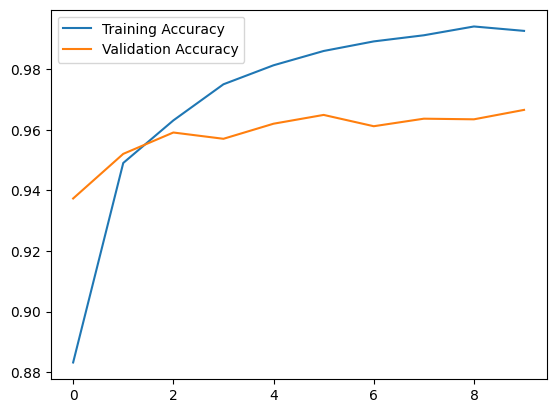

In [123]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()